In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('MIS384 Assignment 1 Data T1 2025.csv')
df

,Order ID,Order Date,Shipping Date,Shipping Mode,Customer ID,Customer Name,Segment,City,State,Country,Product ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost
0,IN-2024-JS156857-42035,31/1/2024,1/2/2024,First Class,JS-156857,Jim Sink,Corporate,Townsville,Queensland,Australia,TEC-CO-3597,"Brother Fax Machine, High-Speed",Technology,Copiers,2565,9,0.1,28,766
1,IN-2024-MW182207-42221,5/8/2024,6/8/2024,First Class,MW-182207,Mitch Webber,Consumer,Geraldton,Western Australia,Australia,OFF-AP-3577,"Breville Refrigerator, White",Office Supplies,Appliances,4191,9,0.1,1164,614
2,IN-2024-JH158207-42140,16/5/2024,18/5/2024,Second Class,JH-158207,John Huston,Consumer,Melbourne,Victoria,Australia,TEC-PH-3147,"Apple Smart Phone, Cordless",Technology,Phones,2863,5,0.1,858,581
3,IN-2024-RW195407-42327,19/11/2024,25/11/2024,Standard Class,RW-195407,Rick Wilson,Corporate,Perth,Western Australia,Australia,TEC-PH-3806,"Cisco Smart Phone, Full Size",Technology,Phones,3524,6,0.1,861,531
4,IN-2024-MP181757-42347,9/12/2024,11/12/2024,First Class,MP-181757,Mike Pelletier,Home Office,Perth,Western Australia,Australia,TEC-PH-3149,"Apple Smart Phone, with Caller ID",Technology,Phones,1725,3,0.1,747,479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,IN-2022-TS212057-41528,11/9/2022,17/9/2022,Standard Class,TS-212057,Thomas Seio,Corporate,Toowoomba,Queensland,Australia,OFF-AR-3482,"Binney & Smith Highlighters, Easy-Erase",Office Supplies,Art,30,2,0.1,12,1
2938,IN-2022-CC126107-41541,24/9/2022,28/9/2022,Standard Class,CC-126107,Corey Catlett,Corporate,Wollongong,New South Wales,Australia,OFF-BI-3253,"Avery Binder, Economy",Office Supplies,Binders,11,1,0.1,3,1
2939,IN-2022-AD101807-41552,5/10/2022,9/10/2022,Standard Class,AD-101807,Alan Dominguez,Home Office,Perth,Western Australia,Australia,OFF-EN-5028,"Kraft Clasp Envelope, with clear poly window",Office Supplies,Envelopes,22,2,0.1,1,1
2940,ID-2022-JH159107-41366,2/4/2022,7/4/2022,Second Class,JH-159107,Jonathan Howell,Consumer,Perth,Western Australia,Australia,OFF-PA-4484,"Green Bar Parchment Paper, Recycled",Office Supplies,Paper,14,1,0.1,0,1


In [3]:
df['Category'].unique()

array(['Technology', 'Office Supplies', 'Furniture'], dtype=object)

In [4]:
df['Sub-Category'].unique()


array(['Copiers', 'Appliances', 'Phones', 'Storage', 'Bookcases',
       'Accessories', 'Chairs', 'Tables', 'Machines', 'Furnishings',
       'Art', 'Paper', 'Binders', 'Supplies', 'Envelopes', 'Fasteners',
       'Labels'], dtype=object)

## **1. Data Exploring**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2942 entries, 0 to 2941
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       2942 non-null   object 
 1   Order Date     2942 non-null   object 
 2   Shipping Date  2942 non-null   object 
 3   Shipping Mode  2942 non-null   object 
 4   Customer ID    2942 non-null   object 
 5   Customer Name  2942 non-null   object 
 6   Segment        2942 non-null   object 
 7   City           2942 non-null   object 
 8   State          2942 non-null   object 
 9   Country        2942 non-null   object 
 10  Product ID     2942 non-null   object 
 11  Product Name   2942 non-null   object 
 12  Category       2942 non-null   object 
 13  Sub-Category   2942 non-null   object 
 14  Sales          2942 non-null   int64  
 15  Quantity       2942 non-null   int64  
 16  Discount       2942 non-null   float64
 17  Profit         2942 non-null   int64  
 18  Shipping

In [6]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Shipping Date,Shipping Mode,Customer ID,Customer Name,Segment,City,State,Country,Product ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost


In [7]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Shipping Date,0
Shipping Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0
Country,0


## **2. Question and Answer**

### **Score customers by ranking them based on R/F/M attribute separately (Hints: RFM stands for Recency, Frequency, and Monetary value. It is a framework used by businesses to segment their customers based on their purchasing behaviour.)**

Calculating Recency, Frequency, Monetary for Customers

In [8]:
today = pd.Timestamp.today().normalize()
df['Order Date'] = pd.to_datetime(df['Order Date'])
recency = df.groupby('Customer ID')['Order Date'].max().apply(lambda x: (today - x).days)
frequency = df.groupby('Customer ID')['Order ID'].nunique()
monetary = df.groupby('Customer ID')['Sales'].sum()

rfm_df = pd.concat([recency, frequency, monetary], axis=1)
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

rfm_df

,Recency,Frequency,Monetary
Customer ID,,,
AA-103157,219,1,355
AA-103757,97,1,444
AA-104807,520,1,1171
AA-106457,279,2,1725
AB-100157,520,2,4504
...,...,...,...
WB-218507,457,2,919
XP-218657,221,2,1959
XP-2186592,675,1,23


**Customer Segmentation result from SQL**

Import data from SQL queries

In [9]:
df_segment = pd.read_csv('customer_segments.csv')
df_segment['rfm_cell'] = df_segment['rfm_cell'].astype(str)
df_segment

,customer_id,rfm_cell,RFM_Segment
0,IG-150857,555,Champions
1,MS-175307,555,Champions
2,GB-145307,555,Champions
3,GM-146807,555,Champions
4,BW-110657,555,Champions
...,...,...,...
834,BB-1099092,111,At Risk
835,TM-210107,111,At Risk
836,AP-1091592,111,At Risk
837,SH-2039599,111,At Risk


## **Marketing Analysis: Identifying High-value Customers and Recommending Approaches**

#### **Identifying High-Values Customers**

In [10]:
df_customer = df.merge(rfm_df, on='Customer ID').merge(df_segment , left_on='Customer ID', right_on='customer_id')
df_customer

,Order ID,Order Date,Shipping Date,Shipping Mode,Customer ID,Customer Name,Segment,City,State,Country,Product ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Recency,Frequency,Monetary,customer_id,rfm_cell,RFM_Segment
0,IN-2024-JS156857-42035,2024-01-31,1/2/2024,First Class,JS-156857,Jim Sink,Corporate,Townsville,Queensland,Australia,TEC-CO-3597,"Brother Fax Machine, High-Speed",Technology,Copiers,2565,9,0.1,28,766,158,2,2840,JS-156857,535,Average
1,IN-2024-MW182207-42221,2024-08-05,6/8/2024,First Class,MW-182207,Mitch Webber,Consumer,Geraldton,Western Australia,Australia,OFF-AP-3577,"Breville Refrigerator, White",Office Supplies,Appliances,4191,9,0.1,1164,614,239,1,4191,MW-182207,415,Average
2,IN-2024-JH158207-42140,2024-05-16,18/5/2024,Second Class,JH-158207,John Huston,Consumer,Melbourne,Victoria,Australia,TEC-PH-3147,"Apple Smart Phone, Cordless",Technology,Phones,2863,5,0.1,858,581,310,3,3999,JH-158207,355,Average
3,IN-2024-RW195407-42327,2024-11-19,25/11/2024,Standard Class,RW-195407,Rick Wilson,Corporate,Perth,Western Australia,Australia,TEC-PH-3806,"Cisco Smart Phone, Full Size",Technology,Phones,3524,6,0.1,861,531,133,4,4810,RW-195407,555,Champions
4,IN-2024-MP181757-42347,2024-12-09,11/12/2024,First Class,MP-181757,Mike Pelletier,Home Office,Perth,Western Australia,Australia,TEC-PH-3149,"Apple Smart Phone, with Caller ID",Technology,Phones,1725,3,0.1,747,479,113,1,1725,MP-181757,514,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,IN-2022-TS212057-41528,2022-09-11,17/9/2022,Standard Class,TS-212057,Thomas Seio,Corporate,Toowoomba,Queensland,Australia,OFF-AR-3482,"Binney & Smith Highlighters, Easy-Erase",Office Supplies,Art,30,2,0.1,12,1,609,5,3758,TS-212057,255,Average
2938,IN-2022-CC126107-41541,2022-09-24,28/9/2022,Standard Class,CC-126107,Corey Catlett,Corporate,Wollongong,New South Wales,Australia,OFF-BI-3253,"Avery Binder, Economy",Office Supplies,Binders,11,1,0.1,3,1,107,5,1001,CC-126107,554,Champions
2939,IN-2022-AD101807-41552,2022-10-05,9/10/2022,Standard Class,AD-101807,Alan Dominguez,Home Office,Perth,Western Australia,Australia,OFF-EN-5028,"Kraft Clasp Envelope, with clear poly window",Office Supplies,Envelopes,22,2,0.1,1,1,909,1,1169,AD-101807,114,Average
2940,ID-2022-JH159107-41366,2022-04-02,7/4/2022,Second Class,JH-159107,Jonathan Howell,Consumer,Perth,Western Australia,Australia,OFF-PA-4484,"Green Bar Parchment Paper, Recycled",Office Supplies,Paper,14,1,0.1,0,1,422,3,725,JH-159107,353,Average


**Profit contribution by Customer Segments**

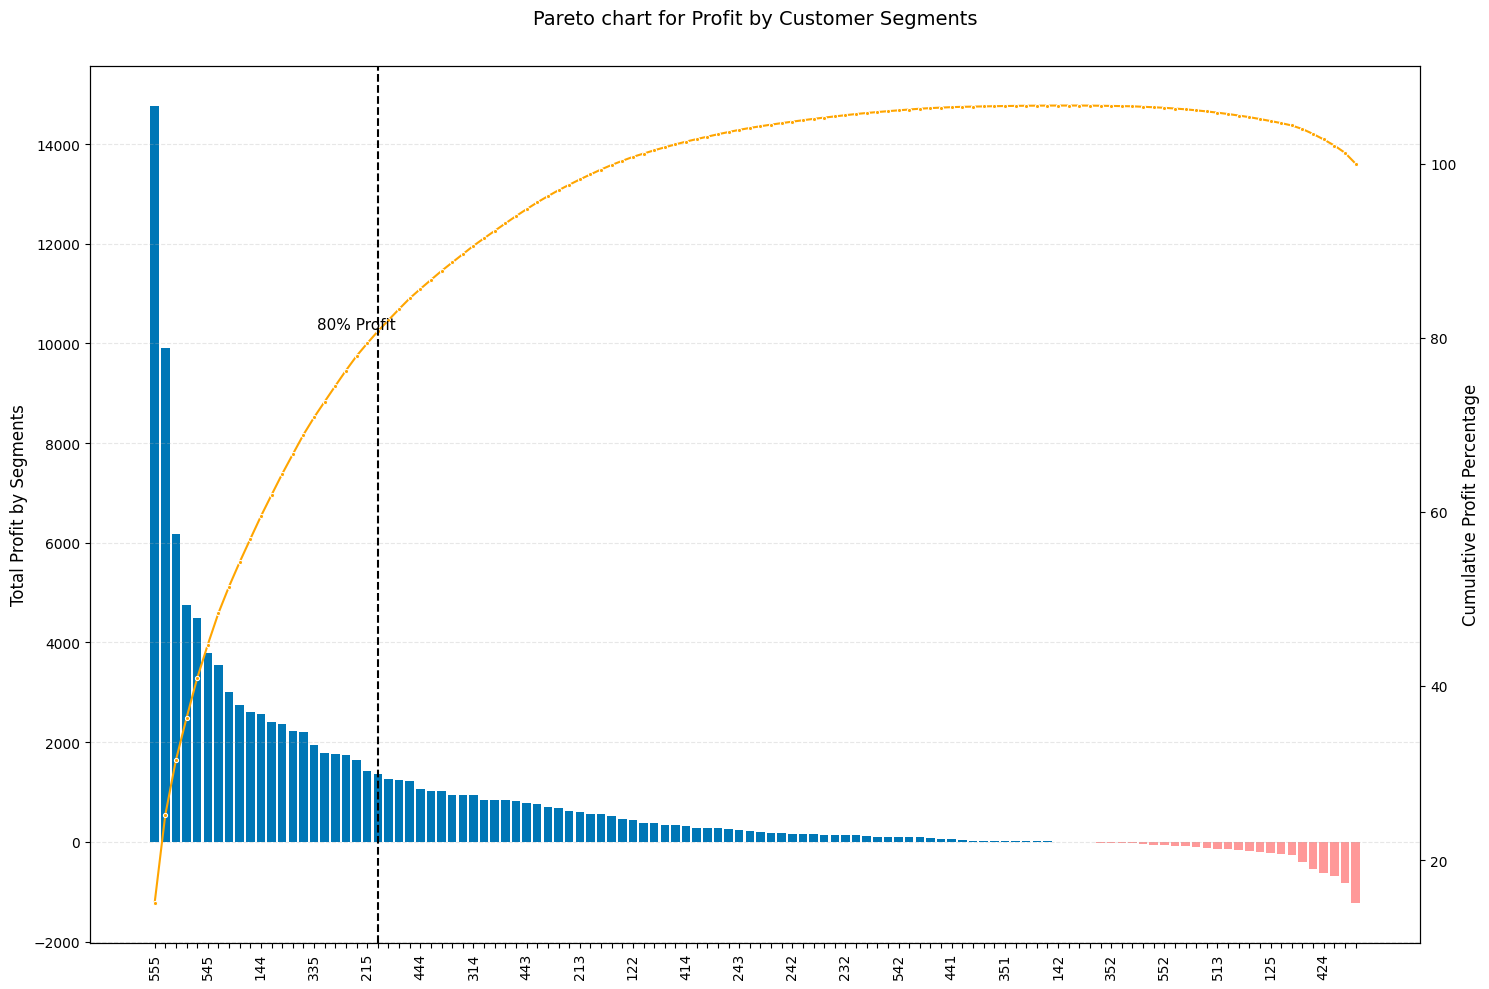

In [11]:
# Refined Pareto Chart - keeping original style with minor improvements
df_pareto = pd.DataFrame(df_customer.groupby('rfm_cell')['Profit'].sum()).sort_values(by='Profit', ascending=False).reset_index()

df_pareto['Cumulative Profit'] = df_pareto['Profit'].cumsum()
total_Profit = df_pareto['Profit'].sum()
df_pareto['Cumulative Profit Percentage'] = (df_pareto['Cumulative Profit'] / total_Profit) * 100

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(15,10))

# Define colors for bars - blue for positive, light red for negative
bar_colors = ['#0077b6' if profit >= 0 else '#ff9999' for profit in df_pareto['Profit']]

# Plot profit in barchart with custom colors
bars = ax1.bar(df_pareto.index, df_pareto['Profit'], color=bar_colors)

# Set x-tick positions and labels
x_tick_positions = np.arange(len(df_pareto))
ax1.set_xticks(x_tick_positions)
ax1.set_xticklabels(df_pareto['rfm_cell'], rotation=90)

# Show only every nth label to prevent overcrowding
n = max(1, len(df_pareto) // 20)  # Show at most ~20 labels
for i, label in enumerate(ax1.xaxis.get_ticklabels()):
    if i % n != 0:
        label.set_visible(False)

# Make y-axis grid lines
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_ylabel('Total Profit by Segments', fontsize=12)

# Create secondary axis for cumulative percentage
ax2 = plt.twinx()
sns.lineplot(data=df_pareto, x=x_tick_positions, y='Cumulative Profit Percentage',
             ax=ax2, color='orange', marker='o', markersize=3)
ax2.set_ylabel('Cumulative Profit Percentage', fontsize=12)

# Find where 80% cumulative profit is reached
eighty_percent_idx = df_pareto[df_pareto['Cumulative Profit Percentage'] >= 80].index[0]
top_segments = eighty_percent_idx + 1  # Number of segments to reach 80%

# Add dash line at 80%
plt.axvline(x=eighty_percent_idx, color='black', linestyle='--')

# Add note for 80% - position it better
text_x = eighty_percent_idx - len(df_pareto) * 0.05  # Place text slightly to the left of the line
plt.text(x=text_x, y=81, s='80% Profit', fontsize=11)

# Main title
plt.title('Pareto chart for Profit by Customer Segments', fontsize=14, pad=30)

plt.tight_layout()
plt.show()

In [12]:
df_80 = df_pareto[df_pareto['Cumulative Profit Percentage'] <= 80]
list_80 = df_80['rfm_cell'].to_list()
print("Cummulative Sales by top Segments")
df_80

Cummulative Sales by top Segments


,rfm_cell,Profit,Cumulative Profit,Cumulative Profit Percentage
0,555,14773,14773,15.061119
1,355,9906,24679,25.160317
2,245,6185,30864,31.465943
3,135,4747,35611,36.305525
4,455,4481,40092,40.873918
5,545,3793,43885,44.740893
6,435,3551,47436,48.361149
7,554,3004,50440,51.423736
8,145,2745,53185,54.222272
9,234,2606,55791,56.879097


Extract High-value customers

In [13]:
df_top = df_customer[df_customer['rfm_cell'].isin(list_80)]
df_top

,Order ID,Order Date,Shipping Date,Shipping Mode,Customer ID,Customer Name,Segment,City,State,Country,Product ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Recency,Frequency,Monetary,customer_id,rfm_cell,RFM_Segment
2,IN-2024-JH158207-42140,2024-05-16,18/5/2024,Second Class,JH-158207,John Huston,Consumer,Melbourne,Victoria,Australia,TEC-PH-3147,"Apple Smart Phone, Cordless",Technology,Phones,2863,5,0.1,858,581,310,3,3999,JH-158207,355,Average
3,IN-2024-RW195407-42327,2024-11-19,25/11/2024,Standard Class,RW-195407,Rick Wilson,Corporate,Perth,Western Australia,Australia,TEC-PH-3806,"Cisco Smart Phone, Full Size",Technology,Phones,3524,6,0.1,861,531,133,4,4810,RW-195407,555,Champions
5,IN-2024-CG125207-42077,2024-03-14,18/3/2024,Standard Class,CG-125207,Claire Gute,Consumer,Adelaide,South Australia,Australia,OFF-AP-4745,"Hoover Stove, White",Office Supplies,Appliances,3569,7,0.1,674,458,119,2,4478,CG-125207,545,Champions
6,IN-2024-TA213857-42351,2024-12-13,17/12/2024,Standard Class,TA-213857,Tom Ashbrook,Home Office,Launceston,Tasmania,Australia,OFF-AP-4508,"Hamilton Beach Stove, White",Office Supplies,Appliances,4864,10,0.1,162,426,109,2,5285,TA-213857,545,Champions
7,IN-2024-GB145307-42260,2024-09-13,19/9/2024,Standard Class,GB-145307,George Bell,Corporate,Brisbane,Queensland,Australia,TEC-CO-4593,"Hewlett Wireless Fax, Laser",Technology,Copiers,4448,13,0.1,444,386,124,3,7409,GB-145307,555,Champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,ID-2022-RM193757-41429,2022-06-04,9/6/2022,Standard Class,RM-193757,Raymond Messe,Consumer,Sydney,New South Wales,Australia,OFF-BI-2898,"Acco Binder, Recycled",Office Supplies,Binders,13,1,0.1,0,1,109,3,1372,RM-193757,554,Champions
2933,ID-2022-BF1100592-41471,2022-07-16,20/7/2022,Standard Class,BF-1100592,Barry Franz,Home Office,Manukau City,Auckland,New Zealand,OFF-FA-6200,"Stockwell Rubber Bands, Metal",Office Supplies,Fasteners,19,2,0.4,-4,1,951,2,2125,BF-1100592,145,Average
2935,IN-2022-MM172607-41438,2022-06-13,20/6/2022,Standard Class,MM-172607,Magdelene Morse,Consumer,Perth,Western Australia,Australia,OFF-BI-4828,"Ibico Index Tab, Clear",Office Supplies,Binders,15,2,0.1,-1,1,1023,2,1523,MM-172607,144,Average
2937,IN-2022-TS212057-41528,2022-09-11,17/9/2022,Standard Class,TS-212057,Thomas Seio,Corporate,Toowoomba,Queensland,Australia,OFF-AR-3482,"Binney & Smith Highlighters, Easy-Erase",Office Supplies,Art,30,2,0.1,12,1,609,5,3758,TS-212057,255,Average


#### **High-value Customer Persona**

By country

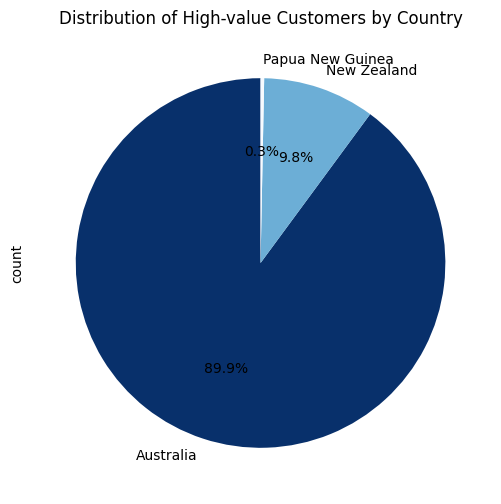

In [14]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')

# Calculate the count of customers by country
country_counts = df_top['Country'].value_counts()

# pie plot
country_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.title('Distribution of High-value Customers by Country')

plt.show()

In [15]:
print("Average shipping cost in two countries:")
df_top.groupby('Country')['Shipping Cost'].mean()

Average shipping cost in two countries:


,Shipping Cost
Country,
Australia,47.384146
New Zealand,58.712000
Papua New Guinea,40.250000


By segments

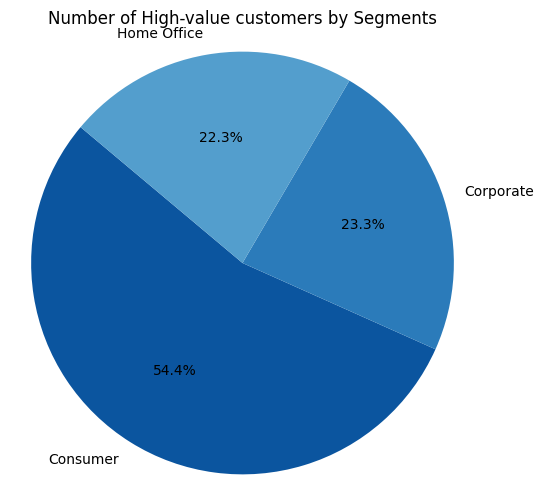

In [16]:
df_segments = df_top[['Customer ID', 'Segment']].drop_duplicates()
segment_counts = df_segments['Segment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6), facecolor='white')
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues_r'))
plt.title('Number of High-value customers by Segments')
plt.axis('equal')
plt.show()

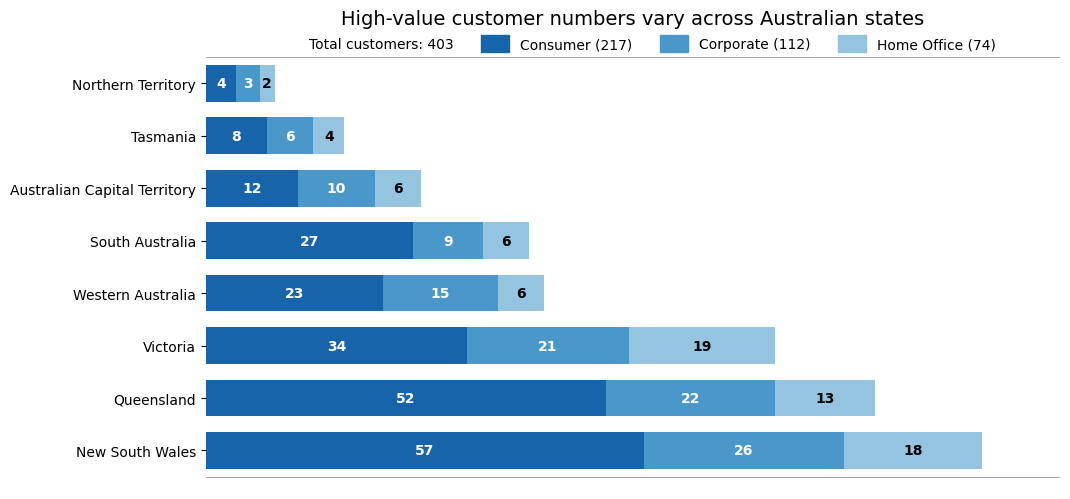

In [17]:
# Filter for Australia only
australia_data = df_top[df_top['Country'] == 'Australia']

# Get unique customers by state and segment
unique_customers = australia_data[['customer_id', 'State', 'Segment']].drop_duplicates()

# Create a pivot table with counts of customers by state and segment
state_segment_counts = pd.crosstab(index=unique_customers['State'],
                                   columns=unique_customers['Segment'])

# Calculate the total customers for each state
state_segment_counts['Total'] = state_segment_counts.sum(axis=1)

# Sort by total customers (descending)
state_segment_counts = state_segment_counts.sort_values('Total', ascending=False)

# Get segment order
segment_order = ['Consumer', 'Corporate', 'Home Office']

# Make sure all segments exist in the data
for segment in segment_order:
    if segment not in state_segment_counts.columns:
        state_segment_counts[segment] = 0

# Reorder columns with segments first, then Total
columns = segment_order + ['Total']
state_segment_counts = state_segment_counts[columns]

# Calculate segment totals for the whole country
segment_totals = state_segment_counts[segment_order].sum()
grand_total = segment_totals.sum()

# Get blues color palette - darker to lighter
colors = sns.color_palette("Blues_r", 4)[:3]  # Get first 3 colors from the reversed Blues palette

# Create figure with appropriate dimensions
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')

# Get states and positions
states = state_segment_counts.index
y_pos = np.arange(len(states))

# Set up the maximum value for the x-axis (the largest state total)
max_x_value = state_segment_counts['Total'].max() * 1.1  # Add 10% margin

# Draw horizontal stacked bars using actual counts (not percentages)
left = np.zeros(len(states))
for i, segment in enumerate(segment_order):
    # Use actual counts for bar widths
    ax.barh(y_pos, state_segment_counts[segment], left=left, height=0.7,
            color=colors[i], label=segment)

    # Add number labels inside bars
    for j, value in enumerate(state_segment_counts[segment]):
        if value > 0:  # Only label if there are customers
            x_pos = left[j] + (value / 2)
            text_color = 'white' if i < 2 else 'black'  # Dark text on light bars
            ax.text(x_pos, y_pos[j], f"{value}", ha='center', va='center',
                   fontweight='bold', color=text_color)

    left += state_segment_counts[segment].values

# Add state labels
ax.set_yticks(y_pos)
ax.set_yticklabels(states)

# Hide x-axis ticks since we're showing the values in the bars
ax.set_xticks([])

# Add the title in the center of the chart
ax.set_title("High-value customer numbers vary across Australian states",
            fontsize=14, pad=15)

# Remove the separate legend and integrate it with the totals
# Add horizontal lines at top and bottom of chart
ax.axhline(y=-0.5, color='gray', linestyle='-', linewidth=0.5)
ax.axhline(y=len(states)-0.5, color='gray', linestyle='-', linewidth=0.5)

# Set up fixed proportions for the x-axis
ax.set_xlim(0, max_x_value)

# Remove chart borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Create custom legend with grand total and segment totals integrated
legend_elements = []

# First add the grand total (without a color patch)
# Use a blank/invisible patch for the grand total
blank_patch = plt.Rectangle((0, 0), 0, 0, fill=False, edgecolor='none')
legend_elements.append((blank_patch, f"Total customers: {grand_total}"))

# Then add each segment with its total
for i, segment in enumerate(segment_order):
    # Create a patch (rectangle) for each segment with its color
    patch = plt.Rectangle((0, 0), 1, 1, color=colors[i])
    # Create a legend element with segment name and its total
    legend_elements.append((patch, f"{segment} ({segment_totals[segment]})"))

# Position the legend with totals at the top center
ax.legend(*zip(*legend_elements), loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, frameon=False, handleheight=1.5, handlelength=2)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.9])
plt.show()


#### **High-value Customers' Behaviour**

Number of orders by months

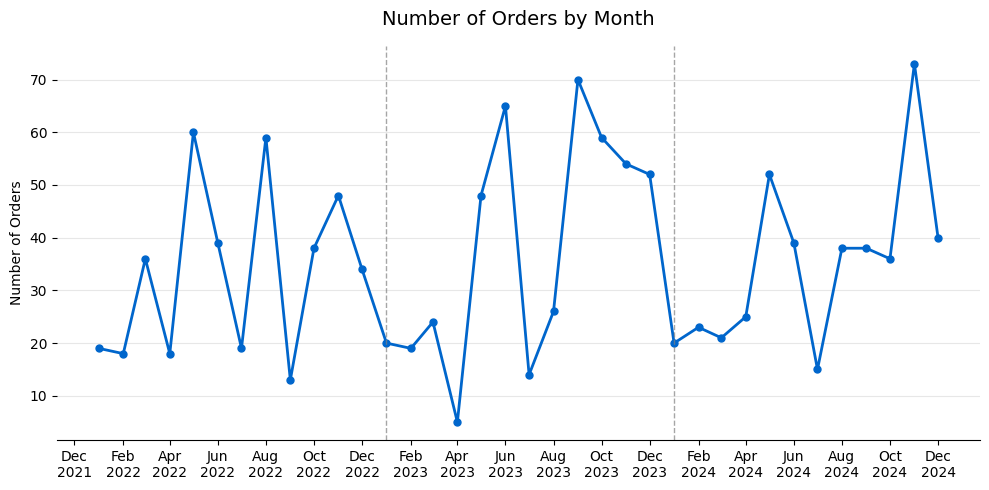

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Process data
df_top['Order Date'] = pd.to_datetime(df_top['Order Date'])
df_top['Order Month'] = df_top['Order Date'].dt.to_period('M').dt.to_timestamp()
df_filtered = df_top[df_top['Order Month'].dt.year >= 2022]

# Group by month and count orders
monthly_orders = df_filtered.groupby('Order Month')['Order ID'].count().reset_index()

# Create figure and plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot with McKinsey styling
ax.plot(monthly_orders['Order Month'], monthly_orders['Order ID'],
        color='#0066CC', linewidth=2, marker='o', markersize=5)

# Add year separators
for year in sorted(df_filtered['Order Month'].dt.year.unique())[1:]:
    ax.axvline(x=pd.Timestamp(f"{year}-01-01"), color='grey',
               linestyle='--', linewidth=1, alpha=0.7)

# Clean up formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.yaxis.grid(True, linestyle='-', alpha=0.2, color='#888888')
ax.set_axisbelow(True)

# Title and labels
ax.set_title('Number of Orders by Month', fontsize=14, pad=15)
ax.set_ylabel('Number of Orders', fontsize=10)

# Remove chart junk
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Best selling products

In [19]:
pd.DataFrame(df_top.groupby('Category')['Quantity'].sum()).reset_index()

,Category,Quantity
0,Furniture,1222
1,Office Supplies,2555
2,Technology,1291


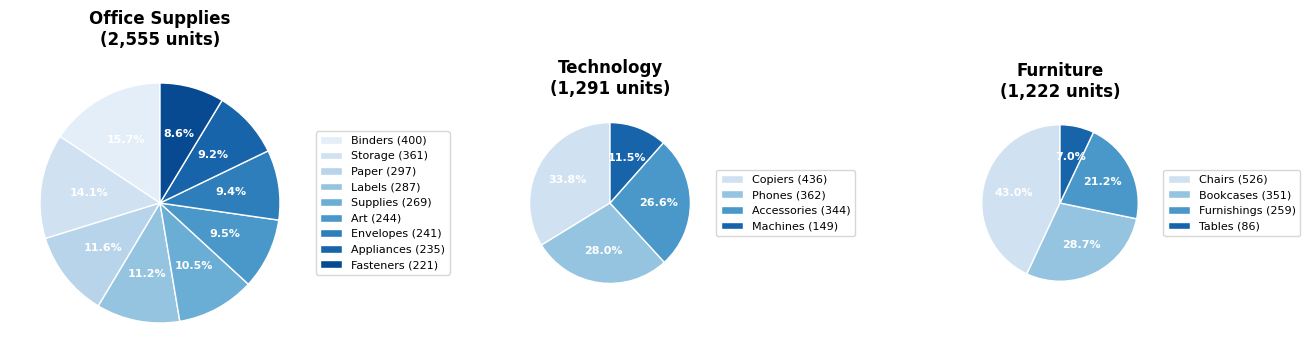

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming df_top is your original dataframe
# First, let's group by Category and Sub-Category to get the quantities
category_subcat_qty = df_top.groupby(['Category', 'Sub-Category'])['Quantity'].sum().reset_index()

# Then calculate the total quantity for each category to determine pie chart sizes
category_totals = category_subcat_qty.groupby('Category')['Quantity'].sum().reset_index()
category_totals = category_totals.sort_values(by='Quantity', ascending=False)

# Create a custom colormap for each category
# We'll use different shades of blue for each category
technology_colors = sns.color_palette("Blues", n_colors=len(category_subcat_qty[category_subcat_qty['Category'] == 'Technology']))
office_colors = sns.color_palette("Blues", n_colors=len(category_subcat_qty[category_subcat_qty['Category'] == 'Office Supplies']))
furniture_colors = sns.color_palette("Blues", n_colors=len(category_subcat_qty[category_subcat_qty['Category'] == 'Furniture']))

# Create a figure with appropriate size
plt.figure(figsize=(15, 10))

# Set the positions for the pie charts
positions = [(0.2, 0.5), (0.5, 0.5), (0.8, 0.5)]  # Left, center, right positions

# Sort categories by total quantity and iterate through them
for i, (category, position) in enumerate(zip(category_totals['Category'], positions)):
    # Calculate the relative size of the pie chart based on the category's total quantity
    # The formula scales the size between 0.1 (minimum) and 0.25 (maximum)
    total_qty = category_totals.iloc[i]['Quantity']
    max_qty = category_totals['Quantity'].max()
    # Scale the size between 0.1 (min) and 0.3 (max) based on relative quantity
    relative_size = 0.1 + 0.2 * (total_qty / max_qty)

    # Filter data for current category
    cat_data = category_subcat_qty[category_subcat_qty['Category'] == category]

    # Create a subplot at the specified position
    ax = plt.axes([position[0] - relative_size/2, position[1] - relative_size/2, relative_size, relative_size])

    # Sort subcategories by quantity within this category
    cat_data = cat_data.sort_values(by='Quantity', ascending=False)

    # Select the appropriate color palette based on category
    if category == 'Technology':
        colors = technology_colors
    elif category == 'Office Supplies':
        colors = office_colors
    else:  # 'Furniture'
        colors = furniture_colors

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        cat_data['Quantity'],
        labels=None,  # We'll add a legend instead of cluttering the pie
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'w', 'linewidth': 1}
    )

    # Set font properties for the percentage labels
    plt.setp(autotexts, size=8, weight="bold", color="white")

    # Add title with total quantity
    ax.set_title(f"{category}\n({total_qty:,} units)", fontsize=12, fontweight='bold')

    # Add a legend for this category
    legend_labels = [f"{row['Sub-Category']} ({row['Quantity']:,})" for _, row in cat_data.iterrows()]
    ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()